# Installing the necessary libraries

In [2]:
!pip install sentence-transformers

# Load model

https://www.sbert.net/docs/pretrained_models.html


In [7]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('/Users/lfoppiano/development/projects/embeddings/pre-trained-embeddings/sentence-transformers/all-mpnet-base-v2')



# Vector calculation



In [8]:
from tqdm import tqdm
import numpy as np
import glob

max_length = 256
sentence_vectors = []
sentiment_vectors = []

for file in glob.glob(f'./resources/supermat_classification.?.tsv'):
    lines = open(file).read().splitlines()
    for line in tqdm(lines):
        split = line.split("\t")
        if len(split) < 2:
            print("skip ", line)
            continue
        text = split[1]
        sentiment = split[2]

        sentence_embeddings = model.encode(text)

        sentence_vectors.append(sentence_embeddings)
        sentiment_vectors.append(sentiment)

vectors = np.vstack(sentence_vectors)
labels = np.array(sentiment_vectors)

100%|██████████| 425/425 [00:57<00:00,  7.36it/s]


## Dimension reduction


In [9]:
from sklearn.decomposition import PCA

sentence_vectors_pca = PCA(n_components=2).fit_transform(vectors)


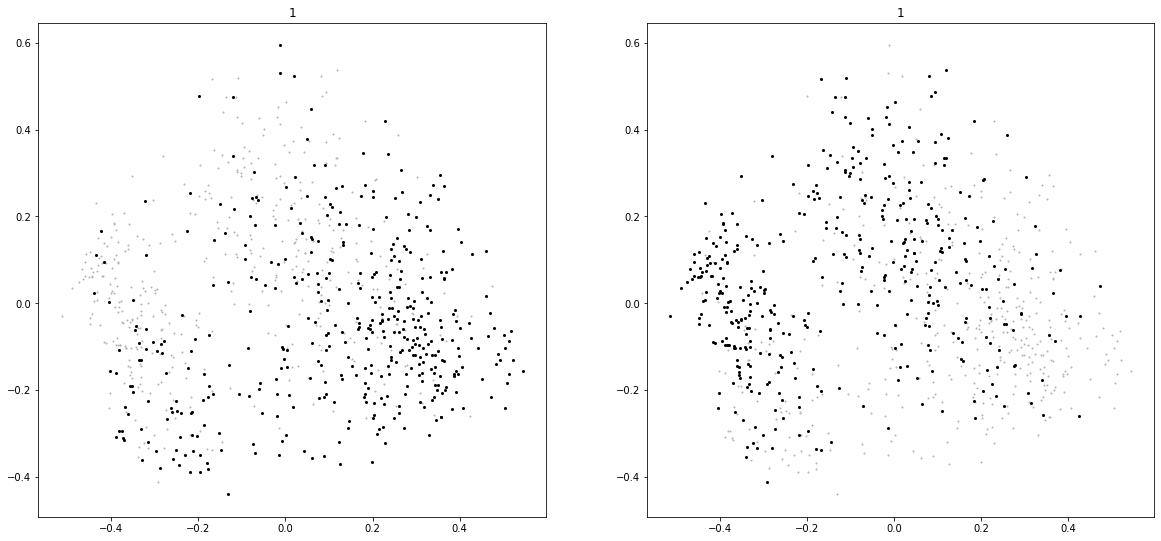

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))
for label in range(2):
    plt.subplot(2,2,label+1)
    # index = [True if l == label else False for l in labels]
    index = str(label) == labels
    plt.plot(
        sentence_vectors_pca[:,0],
        sentence_vectors_pca[:,1],
        'o',
        markersize=1,
        color=[0.7, 0.7, 0.7]
    )
    plt.plot(
        sentence_vectors_pca[index,0],
        sentence_vectors_pca[index,1],
        'o',
        markersize=2,
        color='k'
    )
    plt.title(label)

In [11]:
from sklearn.manifold import TSNE

sentence_vectors_tsne = TSNE(n_components=2).fit_transform(sentence_vectors)

/Users/lfoppiano/opt/anaconda3/envs/bert_tutorial/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/lfoppiano/opt/anaconda3/envs/bert_tutorial/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


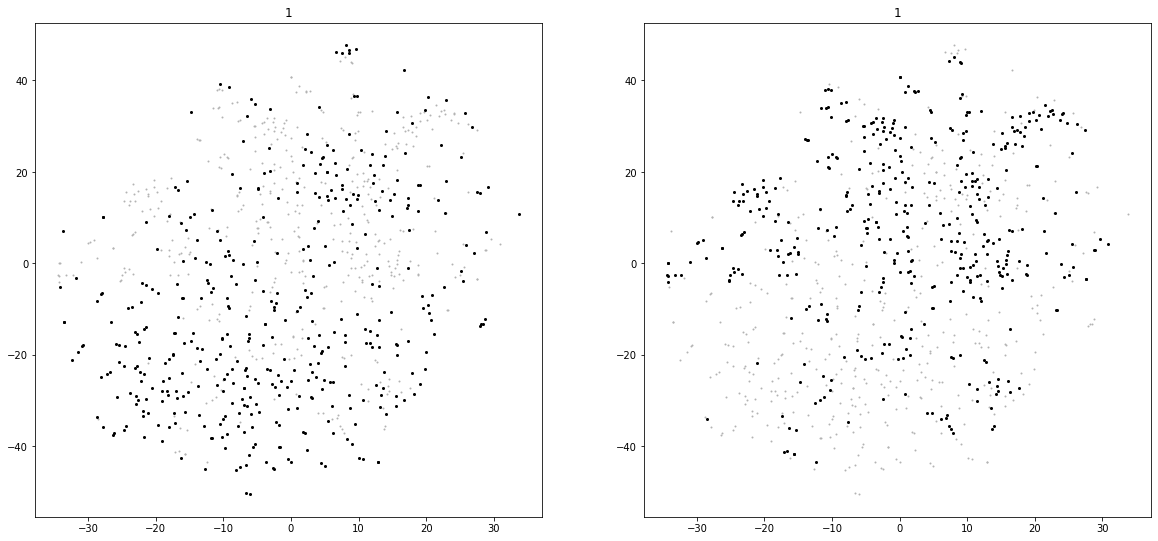

In [12]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))
for label in range(2):
    plt.subplot(2,2,label+1)
    # index = [True if l == label else False for l in labels]
    index = str(label) == labels
    plt.plot(
        sentence_vectors_tsne[:,0],
        sentence_vectors_tsne[:,1],
        'o',
        markersize=1,
        color=[0.7, 0.7, 0.7]
    )
    plt.plot(
        sentence_vectors_tsne[index,0],
        sentence_vectors_tsne[index,1],
        'o',
        markersize=2,
        color='k'
    )
    plt.title(labels[label])

# Clustering

In [13]:
from sklearn.cluster import KMeans

# Perform kmean clustering
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(vectors)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
clustered_labels = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(vectors[sentence_id])
    clustered_labels[cluster_id].append(labels[sentence_id])


for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(len(cluster))
    print("0:", clustered_labels[i].count("0"), "1:", clustered_labels[i].count("1"))
    print("")

Cluster  1
306
0: 94 1: 212

Cluster  2
544
0: 331 1: 213



In [14]:
from sklearn.manifold import TSNE

clusters_vectors_tsne = [[] for i in range(len(clustered_sentences))]
for i, cluster in enumerate(clustered_sentences):
    clusters_vectors_tsne[i] = TSNE(n_components=2).fit_transform(cluster)

/Users/lfoppiano/opt/anaconda3/envs/bert_tutorial/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/lfoppiano/opt/anaconda3/envs/bert_tutorial/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/lfoppiano/opt/anaconda3/envs/bert_tutorial/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/lfoppiano/opt/anaconda3/envs/bert_tutorial/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


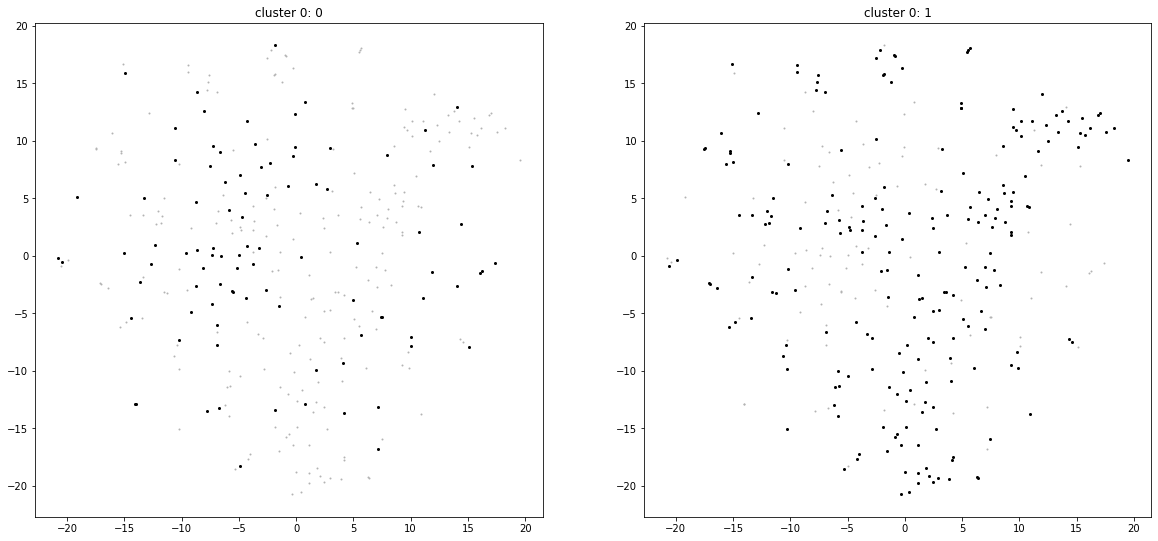

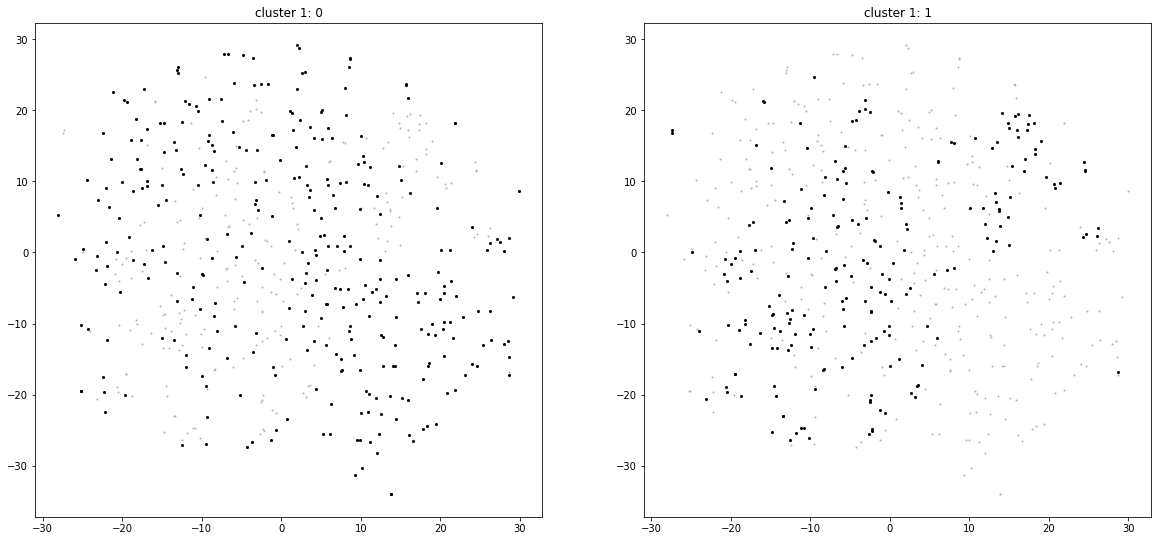

In [15]:
from matplotlib import pyplot as plt

for i, cluster in enumerate(clusters_vectors_tsne):
    plt.figure(figsize=(20,20))
    labs = np.array(clustered_labels[i])

    for label in range(2):
        plt.subplot(2,2,label+1)
        # index = [True if l == label else False for l in labels]
        index = str(label) == labs
        plt.plot(
            cluster[:,0],
            cluster[:,1],
            'o',
            markersize=1,
            color=[0.7, 0.7, 0.7]
        )
        plt.plot(
            cluster[index,0],
            cluster[index,1],
            'o',
            markersize=2,
            color='k'
        )
        plt.title("cluster " + str(i) + ": " + str(label))